In [1]:
%matplotlib widget

In [2]:
from app.core.PoseHelper import PoseHelper
from app.core.SugesstionBuilder import SuggestionBuilder
import mediapipe as mp

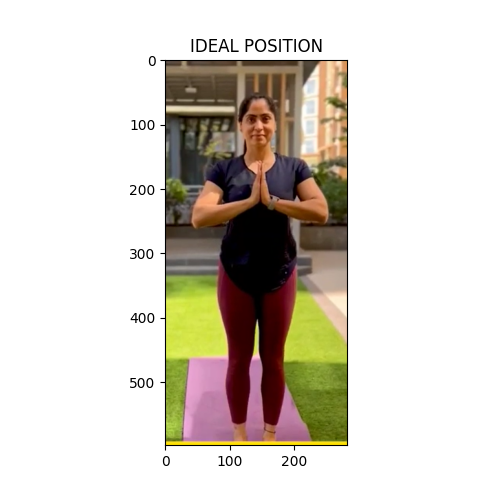

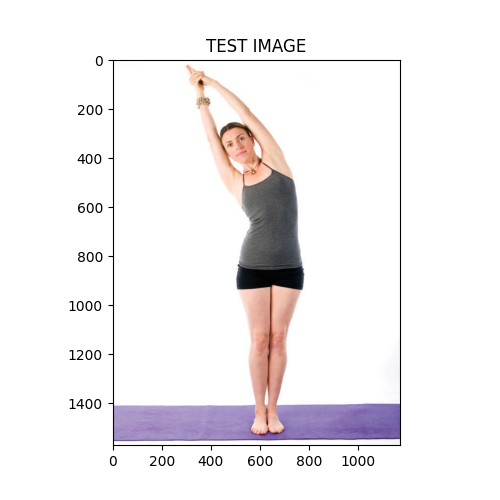

In [3]:
ideal = PoseHelper('app/media/Pranamasana-train.png')
my_pose = PoseHelper('app/media/pranamasana_wrong.jpg')
ideal.display_img([5,5],"IDEAL POSITION")
my_pose.display_img([5,5],"TEST IMAGE")

Landmarks are extracted:
NOSE:
[518.1345851123333, 361.7545419037342, -721.1206722259521]
LEFT_EYE_INNER:
[525.1857960820198, 330.5317285656929, -690.0183438658714]
LEFT_EYE:
[537.4582443535328, 326.1027023792267, -690.8573042750359]
LEFT_EYE_OUTER:
[545.3601765334606, 322.52295757830143, -690.6868599057198]
RIGHT_EYE_INNER:
[498.82453629374504, 344.32356759905815, -670.1895634531975]
RIGHT_EYE:
[490.23590594530106, 350.86841148138046, -671.1691648960114]
RIGHT_EYE_OUTER:
[482.7797674536705, 357.1609453558922, -671.6552314758301]
LEFT_EAR:
[559.9777704179287, 328.6468712091446, -468.86010906100273]
RIGHT_EAR:
[479.19254863262177, 375.16625383496284, -367.61929455399513]
MOUTH_LEFT:
[548.7409008145332, 378.78357124328613, -626.142048060894]
MOUTH_RIGHT:
[518.2067203521729, 391.2405175715685, -603.2130925655365]
LEFT_SHOULDER:
[676.5358592271805, 419.50811073184013, -411.2072313427925]
RIGHT_SHOULDER:
[491.9283794462681, 500.0430399775505, -181.4697713404894]
LEFT_ELBOW:
[564.03514209389

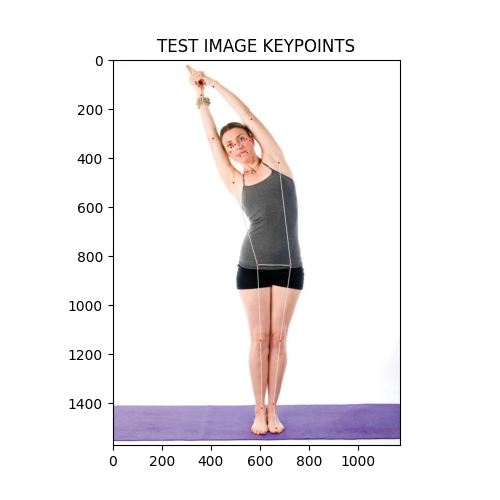

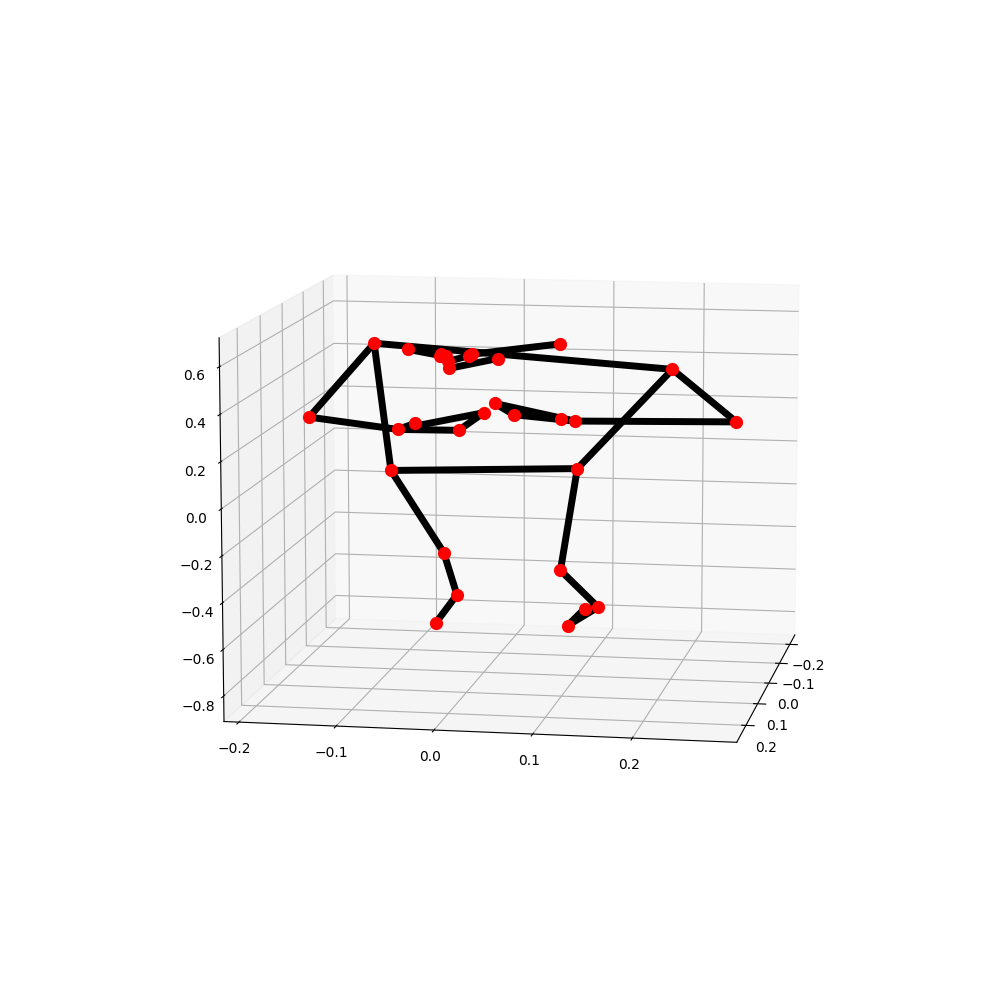

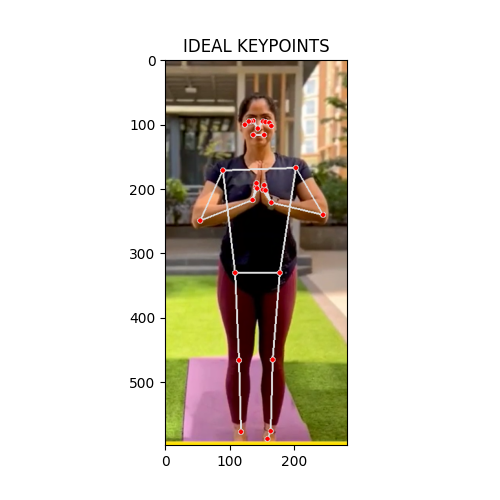

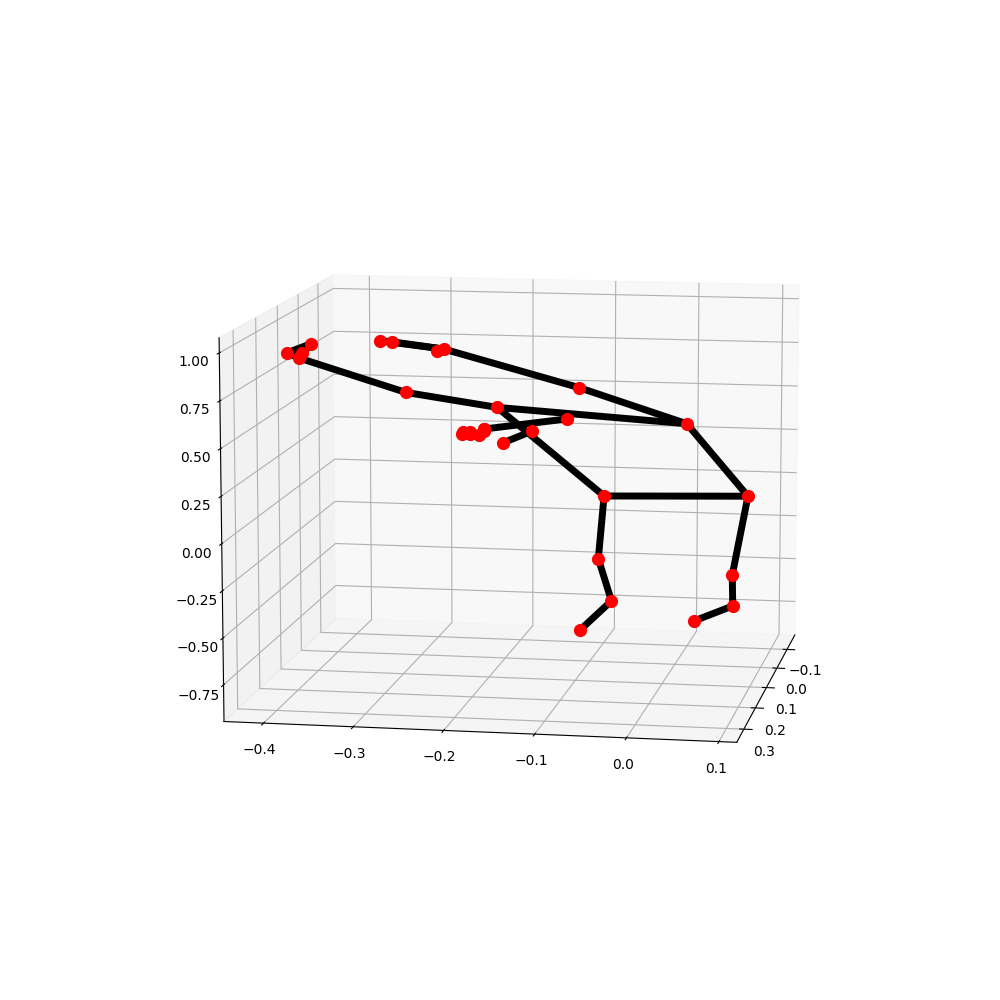

In [4]:
print("Landmarks are extracted:")
ideal.detect_keypoints(verbose=False)
my_pose.detect_keypoints(verbose=True)
my_pose.plot_keypoints2d(fig_title="TEST IMAGE KEYPOINTS")
ideal.plot_keypoints3d()
ideal.plot_keypoints2d(fig_title="IDEAL KEYPOINTS")
my_pose.plot_keypoints3d()

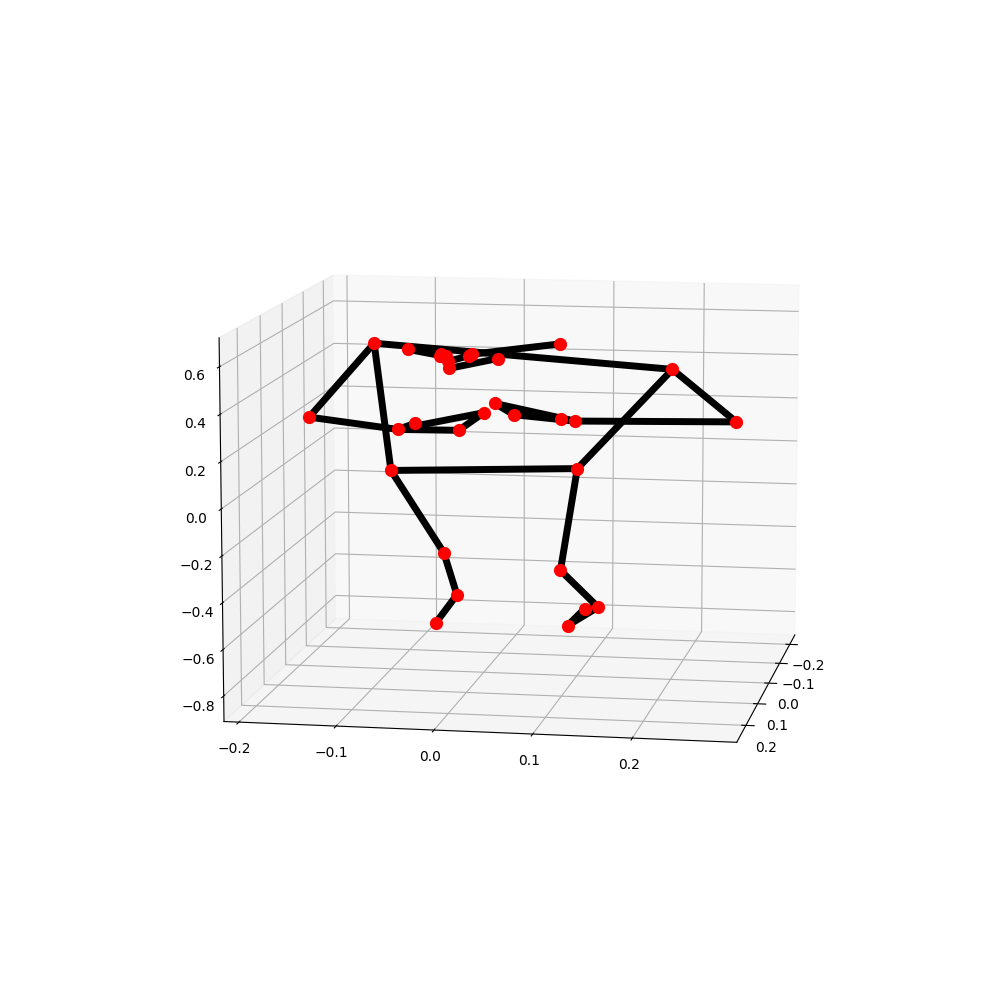

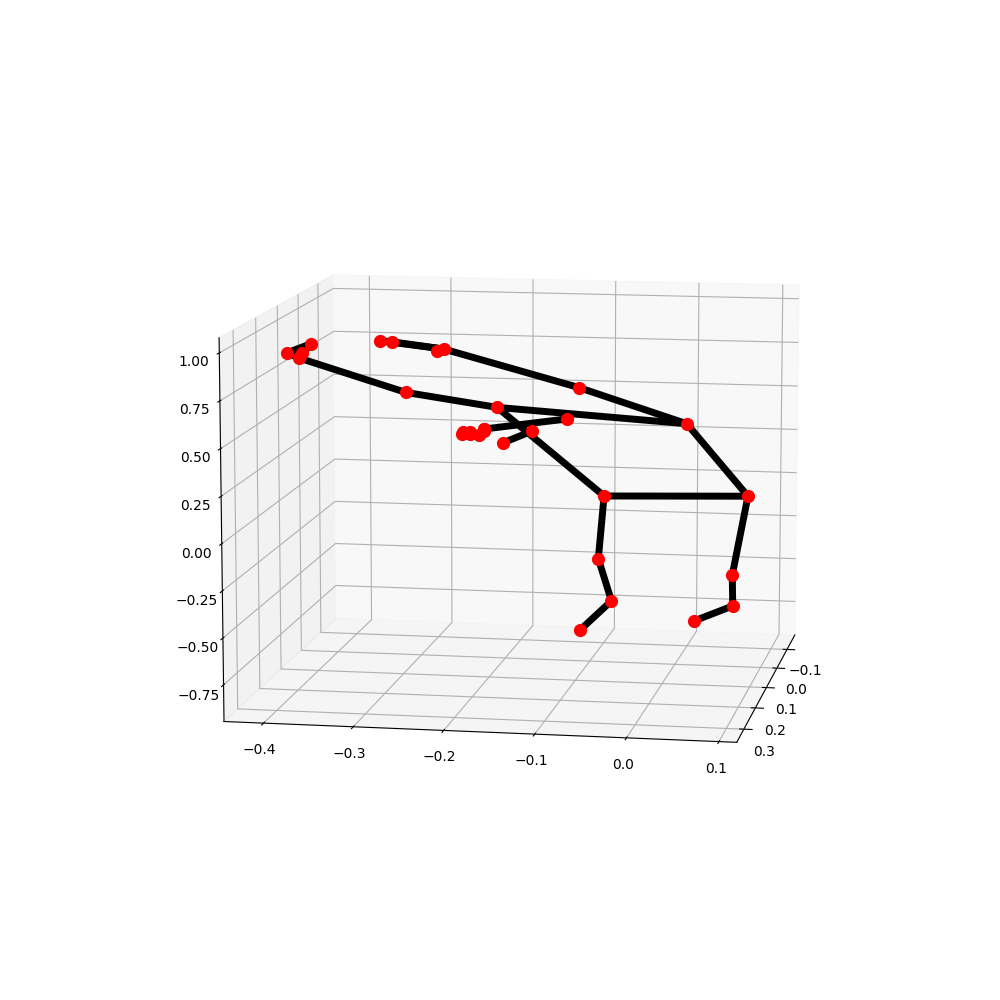

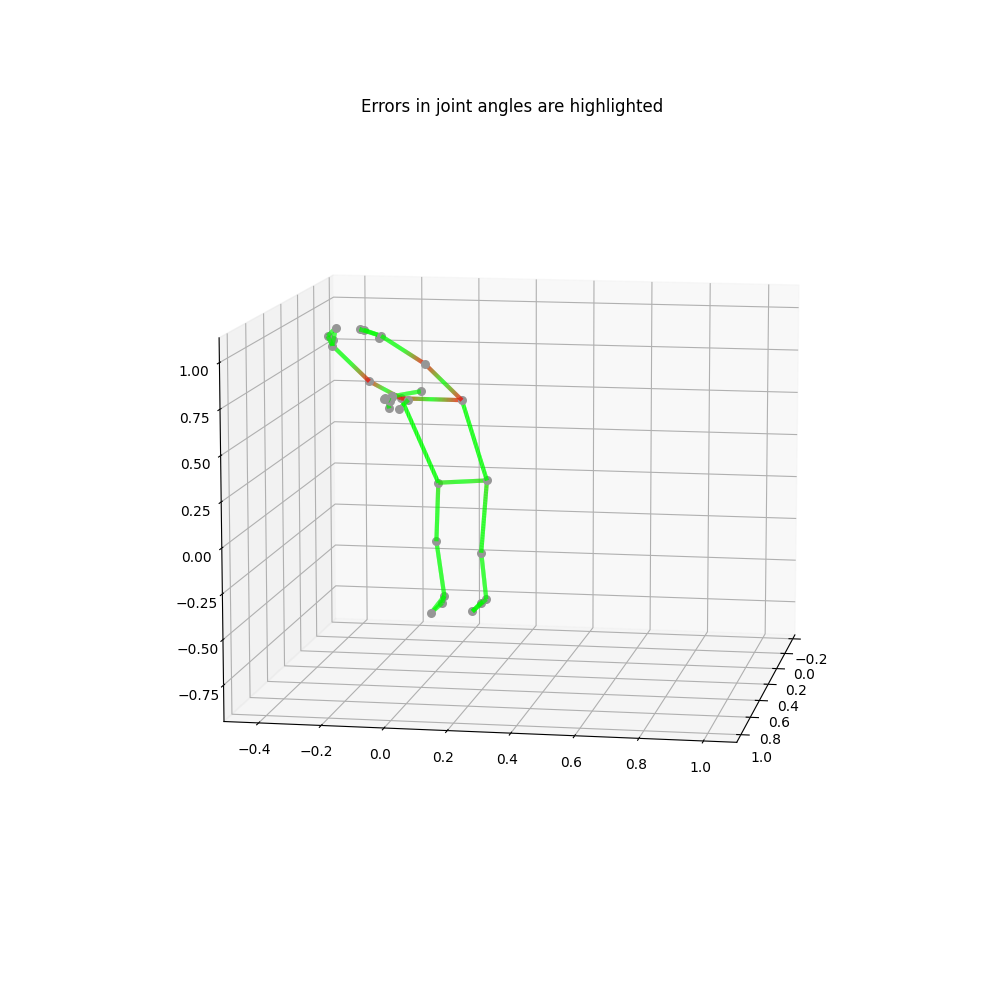

In [5]:
my_pose.calculate_angles()
ideal.calculate_angles()

ideal.plot_keypoints3d() #fig_title="IDEAL BODY POSITION")
my_pose.plot_keypoints3d() #fig_title="Test Body Position")
my_pose.draw3dErrorDetectedSkeleton(ideal,"Errors in joint angles are highlighted", pronounce_error_by=3,verbose=False)

In [6]:
arms_and_angles_diff = PoseHelper.calculate_angle_differences(
                    ideal.arms_and_angles, my_pose.arms_and_angles, 33
                )

In [7]:
suggestor = SuggestionBuilder()
print(suggestor.get_suggestions(arms_and_angles_diff,30))

BEND LEFT_SHOULDER LESS 160.66175702583095 [-160.66175702583095, -7.826675717884046e-16, -9.318352155464211e-16]
BEND RIGHT_SHOULDER LESS 152.13938426238244 [152.13938426238244, -6.41946803858434e-16, 9.428876725242214e-16]
BEND LEFT_ELBOW LESS 151.02777768762044 [-151.02777768762044, 2.940415205919702e-16, -3.6656615622992587e-16]
BEND RIGHT_ELBOW LESS 145.93042564250368 [145.93042564250368, 3.214624998030687e-16, 2.6842704370558205e-16]
BEND LEFT_HIP MORE -15.791572671020436 [15.791572671020436, -1.8920340187145395e-15, -3.695933504150345e-16]
BEND RIGHT_HIP LESS 12.417994086608594 [12.417994086608594, -1.5164506790188044e-15, -6.376951683469681e-17]
BEND LEFT_KNEE MORE -0.7892044406767517 [0.7892044406767517, -9.659047531696002e-17, 3.3602005236203565e-18]
BEND RIGHT_KNEE LESS 0.3205912811557542 [0.3205912811557542, -3.924913278675756e-17, -9.675767330975392e-19]



In [6]:
# print(my_pose.arms_and_angles)
# from math import pi
# import math

# for i in range(len(my_pose.arms_and_angles)):
#     if(my_pose.arms_and_angles[i]):
#         for arms,angle in my_pose.arms_and_angles[i].items():
#             arms = list(arms)
#             print(f"for joint {i}.{my_pose.mp_pose.PoseLandmark(i).name} between {arms[0]}.{my_pose.mp_pose.PoseLandmark(arms[0]).name}  & {arms[1]}.{arms[0]}.{my_pose.mp_pose.PoseLandmark(arms[1]).name} angle: {math.degrees(angle)} degrees")

[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {frozenset({<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.LEFT_ELBOW: 13>}): array([-1.08194070e+00,  1.79453727e-18, -2.98716445e-18])}, {frozenset({<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.RIGHT_ELBOW: 14>}): array([1.11030055e+00, 1.87988038e-18, 3.03101904e-18])}, {frozenset({<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_WRIST: 15>}): array([-2.33668880e+00,  5.72882058e-18, -2.43868124e-18])}, {frozenset({<PoseLandmark.RIGHT_WRIST: 16>, <PoseLandmark.RIGHT_SHOULDER: 12>}): array([2.37246254e+00, 5.81454213e-18, 2.35323678e-18])}, {}, {}, {}, {}, {}, {}, {}, {}, {frozenset({<PoseLandmark.RIGHT_HIP: 24>, <PoseLandmark.LEFT_KNEE: 25>}): array([-5.51050768e-02,  6.74501077e-18,  1.85889209e-19])}, {frozenset({<PoseLandmark.RIGHT_KNEE: 26>, <PoseLandmark.LEFT_HIP: 23>}): array([ 6.63403791e-02, -8.11839532e-18,  2.69387518e-19])}, {frozenset({<PoseLandmark.LEFT_ANKLE: 27>, <PoseLandmark.LEFT_HIP: 23>}): array([ 4.16611991e-0

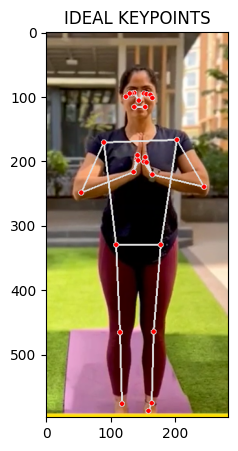

for joint 11.LEFT_SHOULDER between 12.RIGHT_SHOULDER  & 13.LEFT_ELBOW angle: [-1.08194070e+00  1.79453727e-18 -2.98716445e-18] radians
for joint 12.RIGHT_SHOULDER between 11.LEFT_SHOULDER  & 14.RIGHT_ELBOW angle: [1.11030055e+00 1.87988038e-18 3.03101904e-18] radians
for joint 13.LEFT_ELBOW between 11.LEFT_SHOULDER  & 15.LEFT_WRIST angle: [-2.33668880e+00  5.72882058e-18 -2.43868124e-18] radians
for joint 14.RIGHT_ELBOW between 16.RIGHT_WRIST  & 12.RIGHT_SHOULDER angle: [2.37246254e+00 5.81454213e-18 2.35323678e-18] radians
for joint 23.LEFT_HIP between 24.RIGHT_HIP  & 25.LEFT_KNEE angle: [-5.51050768e-02  6.74501077e-18  1.85889209e-19] radians
for joint 24.RIGHT_HIP between 26.RIGHT_KNEE  & 23.LEFT_HIP angle: [ 6.63403791e-02 -8.11839532e-18  2.69387518e-19] radians
for joint 25.LEFT_KNEE between 27.LEFT_ANKLE  & 23.LEFT_HIP angle: [ 4.16611991e-02 -5.10054964e-18  1.06262877e-19] radians
for joint 26.RIGHT_KNEE between 24.RIGHT_HIP  & 28.RIGHT_ANKLE angle: [-2.18495024e-02  2.675579

In [6]:
print(ideal.arms_and_angles)
ideal.plot_keypoints2d(fig_title="IDEAL KEYPOINTS")
# ideal.detect_keypoints(verbose=True)
from math import pi
import math

multiplier = 1# 180/pi
for vertex in range(len(ideal.arms_and_angles)):
    if(ideal.arms_and_angles[vertex]):
        for arms,angle in ideal.arms_and_angles[vertex].items():
            arms = list(arms)
            print(f"for joint {vertex}.{ideal.mp_pose.PoseLandmark(vertex).name} between {arms[0]}.{ideal.mp_pose.PoseLandmark(arms[0]).name}  & {arms[1]}.{ideal.mp_pose.PoseLandmark(arms[1]).name} angle: {angle} radians")

In [ ]:
suggester = SuggestionBuilder(mp.solutions.pose)

In [ ]:
print(suggester.get_suggestions(arms_and_angles_diff,angle_error_threshold=angle_error_threshold))